# Selección óptima de portafolios I

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Separation_theorem_of_MPT.svg/2000px-Separation_theorem_of_MPT.svg.png" width="400px" height="400px" />

En la clase pasada vimos que:
- La LAC describe las posibles selecciones de riesgo-rendimiento entre un activo libre de riesgo y un activo riesgoso.
- Su pendiente es igual al radio de Sharpe del activo riesgoso.
- La asignación óptima de capital para cualquier inversionista es el punto tangente de la curva de indiferencia del inversionista con la LAC (depende de las preferencias particulares - aversión al riesgo).

Para todo lo anterior, supusimos que ya teníamos el portafolio óptimo (activo riesgoso).

En el siguiente análisis:


**Objetivos:**
- ¿Cuál es el portafolio óptimo de activos riesgosos?
 - ¿Cuál es el mejor portafolio de activos riesgosos?
 - Es un portafolio eficiente en media-varianza.
- Problema: dado un conjunto de activos riesgosos, ¿cómo construimos la mejor combinación?

*Referencia:*
- Notas del curso "Portfolio Selection and Risk Management", Rice University, disponible en Coursera.
___

## 1. Maximizando el radio de Sharpe

### ¿Qué pasa si tenemos dos activos riesgosos?

Cuando tenemos dos o más activos riesgosos, tenemos disponibles diferentes LAC. ¿Qué significan sus pendientes?

<font color=blue> Ver en el tablero.</font>

Pregunta:
- ¿Qué es lo que se quiere?

**Conclusión:**
- El mejor portafolio de activos no depende de las preferencias individuales, y por tanto va a ser igual para todos.
- Dicho mejor portafolio maximiza el radio de Sharpe.
- A este portafolio lo llamaremos el portafolio eficiente en media-varianza (EMV)

**Idea principal: el portafolio óptimo de activos riesgosos es independiente de las preferencias del inversionista.**
- El portafolio EMV determina el portafolio óptimo de activos riesgosos.
- Todos tendremos el mismo portafolio de activos riesgosos (EMV), y lo combinaremos con el activo libre de reisgo de acuerdo con las preferencias de cada uno de nosotros (aversión al riesgo).
- La LAC combinando el activo libre de riesgo y el portafolio EMV, se vuelve el conjunto de portafolios eficientes.

Entonces, se deben seguir los siguientes pasos:
1. Crear la frontera media-varianza.
2. Encontrar el portafolio que maximize el radio de Sharpe (portafolio EMV).
3. Construir la frontera eficiente (LAC) del punto $(0,r_f)$ al punto $(\sigma_s,E[r_s])$ del portafolio EMV.
4. Combinar de acuerdo a sus preferencias.
___

## 2. Solución analítica del portafolio EMV: caso con dos activos.

Queremos solucionar el siguiente problema:

\begin{align}
\max_{w_1,w_2} &\quad \frac{E[r_p]-r_f}{\sigma_p}\\
\text{s.a.}    &\quad E[r_p]=w_1E[r_1]+w_2E[r_2]\\
               &\quad \sigma_p=\sqrt{w_1^2\sigma_1^2+w_2^2\sigma_2^2+2w_1w_2\rho_{12}\sigma_1\sigma_2}\\
               &\quad w_1+w_2=1, \quad w_1,w_2\geq0
\end{align}

el cual es equivalente a

\begin{align}
\max_{w_1} &\quad \frac{w_1E[r_1]+(1-w_1)E[r_2]-r_f}{\sqrt{w_1^2\sigma_1^2+(1-w_1)^2\sigma_2^2+2w_1(1-w_1)\rho_{12}\sigma_1\sigma_2}}\\
\text{s.a.}    &\quad 0\leq w_1\leq1
\end{align}

**Actividad.**
El anterior es un problema de maximizar una función de una variable en un dominio cerrado. No debaría representar dificultad.

Encontrar la solución analítica a este problema.

Quien primero lo haga, y salga a explicarlo al tablero, le subo alguna tarea o quiz a 100.

Deben llegar a:

$$w_{1,EMV}=\frac{(E[r_1]-r_f)\sigma_2^2-(E[r_2]-r_f)\sigma_{12}}{(E[r_2]-r_f)\sigma_1^2+(E[r_1]-r_f)\sigma_2^2-((E[r_1]-r_f)+(E[r_2]-r_f))\sigma_{12}}.$$


**Nota:**
- así como obtuvimos una expresión para el peso del portafolio de mínima varianza con dos activos, obtenemos una expresión para el peso del portafolio Eficiente en Media-Varianza.
- Estas actividades son sin duda un buen ejercicio, y se pueden replicar usando técnicas de varias variables (multiplicadores de Lagrange) cuando se tengan más de dos activos.
- Sin embargo, la complejidad del problema crece considerablemente con el número de variables, y la solución analítica deja de ser viable cuando mencionamos que un portafolio bien diversificado consta aproximadamente de 50-60 activos.
- En esos casos, este problema se soluciona con rutinas numéricas que hagan la optimización por nosotros.
- Por eso, les enseño cómo resolver este problema con optimizadores numéricos, porque son una solución viable y escalable a más variables.

## 3. Ejemplo ilustrativo.

Retomamos el ejemplo de mercados de acciones en los países integrantes del $G5$: EU, RU, Francia, Alemania y Japón.

In [1]:
# Importamos pandas y numpy
import pandas as pd
import numpy as np

In [2]:
# Resumen en base anual de rendimientos esperados y volatilidades
annual_ret_summ = pd.DataFrame(columns=['EU', 'RU', 'Francia', 'Alemania', 'Japon'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.1355, 0.1589, 0.1519, 0.1435, 0.1497])
annual_ret_summ.loc['Volatilidad'] = np.array([0.1535, 0.2430, 0.2324, 0.2038, 0.2298])

annual_ret_summ.round(4)

,EU,RU,Francia,Alemania,Japon
Media,0.1355,0.1589,0.1519,0.1435,0.1497
Volatilidad,0.1535,0.243,0.2324,0.2038,0.2298


In [3]:
# Matriz de correlación
corr = pd.DataFrame(data= np.array([[1.0000, 0.5003, 0.4398, 0.3681, 0.2663],
                                    [0.5003, 1.0000, 0.5420, 0.4265, 0.3581],
                                    [0.4398, 0.5420, 1.0000, 0.6032, 0.3923],
                                    [0.3681, 0.4265, 0.6032, 1.0000, 0.3663],
                                    [0.2663, 0.3581, 0.3923, 0.3663, 1.0000]]),
                    columns=annual_ret_summ.columns, index=annual_ret_summ.columns)
corr.round(4)

,EU,RU,Francia,Alemania,Japon
EU,1.0000,0.5003,0.4398,0.3681,0.2663
RU,0.5003,1.0000,0.5420,0.4265,0.3581
Francia,0.4398,0.5420,1.0000,0.6032,0.3923
Alemania,0.3681,0.4265,0.6032,1.0000,0.3663
Japon,0.2663,0.3581,0.3923,0.3663,1.0000


Supondremos, además, que la tasa libre de riesgo es $r_f=5\%$.

In [4]:
# Tasa libre de riesgo
rf = 0.05

Entonces, supondremos que tenemos disponibles los activos correspondientes a los mercados de acciones de EU y Japón, y en adición el activo libre de riesgo.

#### 1. Construir la frontera de mínima varianza

In [6]:
# Vector de w variando entre 0 y 1 con n pasos
w = np.linspace(0, 1, 50)

# Rendimientos esperados individuales
# Activo1: EU, Activo2:Japon
e1 = annual_ret_summ["EU"]["Media"]
e2 = annual_ret_summ["Japon"]["Media"]

# Volatilidades individuales
s1 = annual_ret_summ["EU"]["Volatilidad"]
s2 = annual_ret_summ["Japon"]["Volatilidad"]

# Correlacion
corr12 = corr["EU"]["Japon"]

# Covarianza
cov12 = corr12 * s1 *s2

In [9]:
# DataFrame de portafolios:
# 1. Índice: i
# 2. Columnas 1-2: w, 1-w
# 3. Columnas 3-4: E[r], sigma
# 4. Columna 5: Sharpe ratio
markowitz = pd.DataFrame({
    "w1": w,
    "w2": w-1,
    "rendimiento": w *e1 + (1-w) * e2,
    "volatilidad": (w**2 * s1**2 + (1-w)**2 * s2**2 + 2*w*(1-w)*cov12)**(1/2)
})

# Calcula el sharpe ratio de cada combinación
markowitz['sharpe'] = (markowitz.rendimiento - rf) / markowitz.volatilidad

markowitz

,w1,w2,rendimiento,volatilidad,sharpe
0,0.000000,-1.000000,0.149700,0.229800,0.433856
1,0.020408,-0.979592,0.149410,0.225965,0.439937
2,0.040816,-0.959184,0.149120,0.222171,0.446145
3,0.061224,-0.938776,0.148831,0.218421,0.452477
4,0.081633,-0.918367,0.148541,0.214718,0.458932
5,0.102041,-0.897959,0.148251,0.211063,0.465506
6,0.122449,-0.877551,0.147961,0.207459,0.472195
7,0.142857,-0.857143,0.147671,0.203909,0.478994
8,0.163265,-0.836735,0.147382,0.200417,0.485896
9,0.183673,-0.816327,0.147092,0.196983,0.492893


Text(0, 0.5, 'Sharpe')

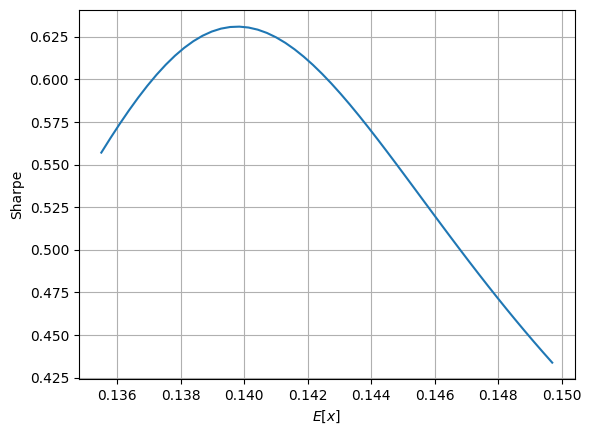

In [12]:
# Importar librerías de gráficos
from matplotlib import pyplot as plt

plt.plot(markowitz.rendimiento, markowitz.sharpe)
plt.grid()
plt.xlabel("$E[x]$")
plt.ylabel("Sharpe")

Text(0, 0.5, 'Sharpe')

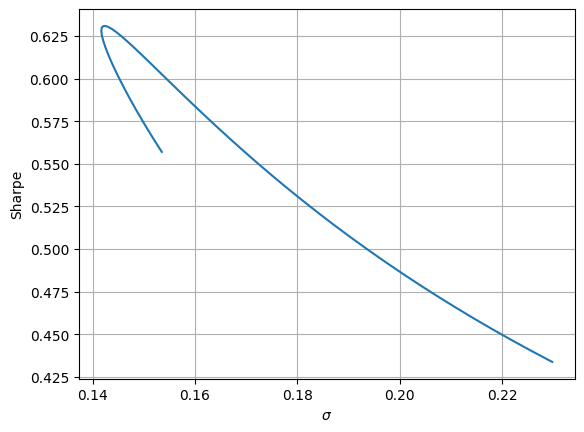

In [35]:
plt.plot(markowitz.volatilidad, markowitz.sharpe)
plt.grid()
plt.xlabel("$\sigma$")
plt.ylabel("Sharpe")

In [14]:
# encuentra el sharpe máximo
max_sharpe = markowitz[markowitz.sharpe == markowitz.sharpe.max()]
max_sharpe

,w1,w2,rendimiento,volatilidad,sharpe
34,0.693878,-0.306122,0.139847,0.142421,0.630855


In [15]:
min_var = markowitz[markowitz.volatilidad == markowitz.volatilidad.min()]
min_var

,w1,w2,rendimiento,volatilidad,sharpe
37,0.755102,-0.244898,0.138978,0.14169,0.627974


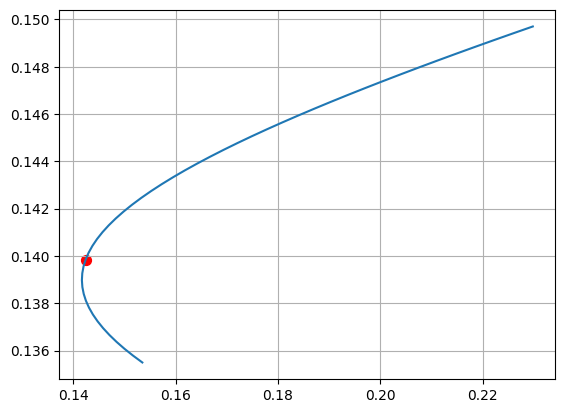

In [20]:
# Gráfica de dispersión de puntos coloreando
# de acuerdo a RS
plt.scatter(max_sharpe.volatilidad, max_sharpe.rendimiento, color="red", s=50)
plt.plot(markowitz.volatilidad, markowitz.rendimiento)
plt.grid()

#### 2. Encontrar el portafolio que maximiza el radio de Sharpe (EMV)

Primero, encontramos este portafolio con la fórmula que obtuvimos:

$$w_{1,EMV}=\frac{(E[r_1]-r_f)\sigma_2^2-(E[r_2]-r_f)\sigma_{12}}{(E[r_2]-r_f)\sigma_1^2+(E[r_1]-r_f)\sigma_2^2-((E[r_1]-r_f)+(E[r_2]-r_f))\sigma_{12}}.$$

In [21]:
# Fórmula que obtuvimos
arriba = (e1 - rf) * s2**2 - (e2 - rf)*cov12
abajo = (e2 - rf) * s1**2 + (e1 - rf) * s2**2 - ((e1 - rf) + (e2 - rf))*cov12
w_emv = arriba/abajo
w_emv

0.6983139170512034

In [23]:
s12 = corr12 * s1 * s2

Ahora sí, con la función scipy.optimize.minimize

In [22]:
# Importar la función minimize del módulo optimize de la librería scipy
from scipy.optimize import minimize

In [24]:
# Función objetivo (-RS)
def minus_rs(w, rf, e1, e2, s1, s2, s12):
    erp = w * e1 + (1 - w) * e2
    sp = ((w * s1)**2 + ((1 - w) * s2)**2 + 2 * w * (1 - w) * s12)**0.5
    rs = (erp - rf) / sp
    return -rs

In [25]:
# Dato inicial
w0 = 0.5
# Cotas de las variables
bnds = ((0, 1),)

In [27]:
# Optimización numérica
emv = minimize(
    fun=minus_rs,
    x0=w0,
    args=(rf, e1, e2, s1, s2, s12),
    bounds=bnds
)
# Resultado
w_emv = emv["x"][0]
w_emv

0.698315830103131

In [29]:
# Rendimiento esperado y volatilidad del portafolio emv
e_emv = e1 * w_emv + (1-w_emv) * e2
s_emv = (s1**2 * w_emv**2 + s2**2 * (1-w_emv)**2 + 2*w_emv*(1-w_emv)*cov12)**(1/2)

e_emv, s_emv

(0.13978391521253553, 0.14231704645685675)

Con lo anterior, podemos obtener datos de rendimiento esperado y volatilidad del portafolio EMV

#### 3. Construir LAC

Ahora, dibujamos la LAC, combinando el portafolio EMV con el activo libre de riesgo:

In [30]:
# Vector de wp variando entre 0 y 1.5 con n pasos
wp = np.linspace(0, 1.5, 100)

In [33]:
# DataFrame de CAL:
# 1. Índice: i
# 2. Columnas 1-2: wp, wrf
# 3. Columnas 3-4: E[r], sigma
# 4. Columna 5: Sharpe ratio
lac = pd.DataFrame({
    "w_acciones": wp,
    "w_bonos": 1-wp,
    "expected": wp * e_emv + (1-wp) * rf,
    "vol": wp*s_emv
})


Text(0, 0.5, '$E[x]$')

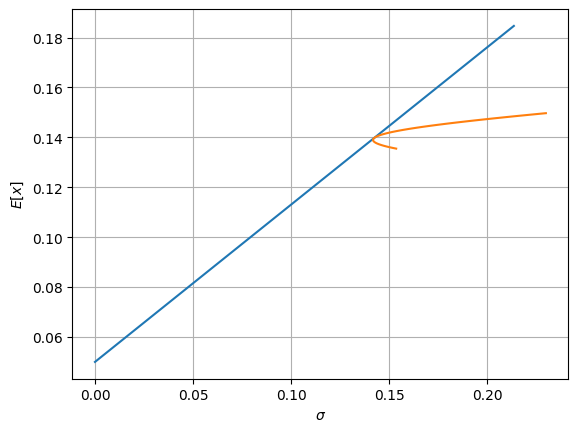

In [36]:
# Gráfica de dispersión de puntos coloreando
# de acuerdo a SR, portafolio EMV y LAC
plt.plot(lac.vol, lac.expected)
plt.plot(markowitz.volatilidad, markowitz.rendimiento)
plt.grid()
plt.xlabel("$\sigma$")
plt.ylabel("$E[x]$")

#### 4. Combinación óptima de acuerdo a preferencias

Con los datos anteriores, y la caracterización de aversión al riesgo, se escoge la combinación óptima entre el portafolio EMV y el activo libre de riesgo de acuerdo a:

$$w^\ast=\frac{E[r_s-r_f]}{\gamma\sigma_s^2}.$$

In [37]:
# Para gamma de 1 a 10
gamma = np.linspace(1, 10, 10)

In [38]:
df = pd.DataFrame({
    "gamma": gamma,
    "w_acciones": (e_emv - rf) / (gamma * s_emv**2)
})
df["w_boss"] = 1-df.w_acciones

df


,gamma,w_acciones,w_boss
0,1.0,4.432867,-3.432867
1,2.0,2.216433,-1.216433
2,3.0,1.477622,-0.477622
3,4.0,1.108217,-0.108217
4,5.0,0.886573,0.113427
5,6.0,0.738811,0.261189
6,7.0,0.633267,0.366733
7,8.0,0.554108,0.445892
8,9.0,0.492541,0.507459
9,10.0,0.443287,0.556713
